## Feed Forward Neural Network :

How a normal Logistic Regression layers look ? 

![tittle](Logistic_regression_part2.svg)

When we add a Linear and Non Linear layer to the Logistic Regression , it becomes Feed Forward Neural Network.

![tittle](FFNN.svg)

In [21]:
from IPython.display import IFrame

IFrame(src='https://ml-cheatsheet.readthedocs.io/en/latest/', width=1500, height=600)

##### Programming FeedForward NN with MNIST dataset :
- Step 1 : Load Dataset
    - Split the data into Train
    - Split the data into Test
    - Display the data 
- Step 2 : Make Dataset Iterable
    - Total Data : 60000
    - minibatch : 100
    - Iteration : 3000
    - Epochs  : **epochs = iterations / (total data / minibatch)** =  3000 / (60000/100) = 5 
- Step 3 : Create Model Class 
- Step 4 : Intanstiate Model Class
- Step 5 : Instanstiate Loss Class
- Step 6 : Instanstiate Optimizer Class
- Step 7 : Train Model
   1.   Convert Inputs/labels to variables
   -  Clear gradients buffers
   -  Get the output given input
   -  Get Loss
   -  Get Gradeints
   -  Update Parameters using gradients
   -  Repeat

## Step 1 : Load Dataset

In [7]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

In [8]:
#Loading MNIST train data set 
train_dataset =  dsets.MNIST(root="./data",
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

In [9]:
#Loading MNIST train data set 
test_dataset =  dsets.MNIST(root="./data",
                            train=False,
                            transform=transforms.ToTensor()
                            )

## Step 2 : Make Dataset Iterable
- Create Train and Test Data Loaders

In [10]:
batch_size=100
n_iters = 3000

num_epochs = n_iters / (len(train_dataset)/batch_size)
num_epochs =int(num_epochs)
num_epochs

5

In [11]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [12]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

## Step 3 : Create Model Class : Build a Feed Forward NN  

In [13]:
class FeedforwardNN(nn.Module):
    def __init__(self,input_dim,hidden_dim,num_classes):
        super().__init__()
        # Linear function
        self.fc1 = nn.Linear(input_dim,hidden_dim)
        # Non- Linear function
        self.sigmoid = nn.Sigmoid()
        # Linear function(readout)
        self.fc2 = nn.Linear(hidden_dim,output_dim)
        
    def forward(self,x):
            # Linear function
            out = self.fc1(x)
            # Non- Linear function
            out = self.sigmoid(out)
            # Linear function(readout)
            out = self.fc2(out)
            
            return out

## Step 4 : Intanstiate Model Class

In [14]:
# Input Dim = size of the image = 28 * 28 = 784 
# Output Dim = 10 = predict 10 numbers 
# Hidden Dim = 100 ,  

input_dim =  28*28
hidden_dim=100
output_dim = 10

model = FeedforwardNN(input_dim,hidden_dim,output_dim)

## Step 5 : Instanstiate Loss Class

In [15]:
criterion  = nn.CrossEntropyLoss()

## Step 6 : Instanstiate Optimizer Class

In [16]:
learning_rate=0.01
optimizer  = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [20]:
#model.parameters(),len(list(model.parameters())),list(model.parameters())

## Step 7 : Train Model
   1.   Convert Inputs/labels to variables
   -  Clear gradients buffers
   -  Get the output given input, forward pass
   -  Get Loss
   -  Get Gradeints
   -  Update Parameters using gradients
   -  Repeat

In [ ]:
iter = 0
# Iterate 5 time 
for epoch in range (num_epochs):
# Loop through all the 60000 images
    for i,(images,labels) in enumerate(train_loader):
        # Load inamges to variable
        images = Variable(images.view(-1,28*28))
        labels = Variable(labels)
        #print ("iter" , i)
        # Reset the gradients 
        optimizer.zero_grad()
        
        # Perform Forward pass
        output = model(images)
        
        # Get the loss 
        loss = criterion(output,labels)
    
        # Get the gradients 
        loss.backward()
        
        # update the parameters 
        optimizer.step()
        
        iter +=1
        
        if iter % 500 == 0 :
            # calculate accuracy 
            correct = 0.
            total = 0.
            j = 0
            for images,labels in test_loader: 
                images = Variable(images.view(-1,28*28))
                output = model(images)
                j += 1
                print("loop", j )
                _,predicted = torch.max(output,1) # returns the max prediction
                
                correct += (predicted == labels).sum()
                print("correct",correct)
            accuracy = 100 *(correct / total)
            print (accuracy)
            
            #Print loss
            print('Iteration: {} . Loss:  {}. Accuracy: {}'.format(iter,loss.data[0],accuracy))
            

![tittle](FFNN_2.svg)

### Hidden Neurons and Forward Propogation 

#### Below videos will give an understanding of 
1. Hidden neurons 
2. Xor feed forward network 
3. Backward propogation

In [1]:
from IPython.display import YouTubeVideo

def display_yotube_video(url, **kwargs):
    """
    Displays a Youtube video in a Jupyter notebook.
    
    Args:
        url (string): a link to a Youtube video.
        **kwargs: further arguments for IPython.display.YouTubeVideo
    
    Returns:
        YouTubeVideo: a video that is displayed in your notebook.
    """
    id_ = url.split("=")[-1]
    return YouTubeVideo(id_, **kwargs)

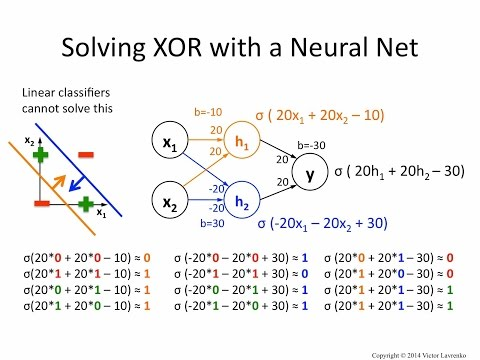

In [2]:
display_yotube_video("https://www.youtube.com/watch?v=kNPGXgzxoHw",width=800, height=800)

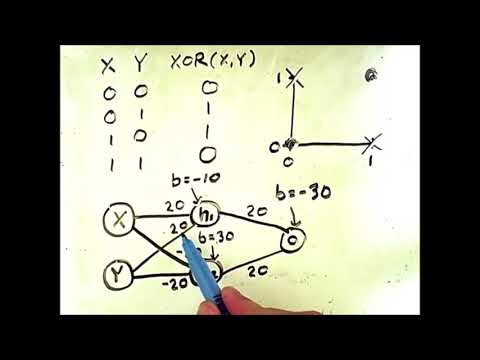

In [3]:
display_yotube_video("https://www.youtube.com/watch?v=s8pDf2Pt9sc",width=800, height=800)

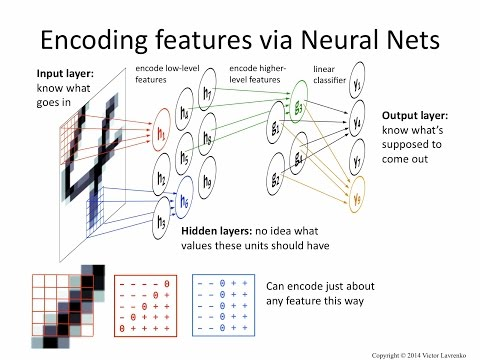

In [5]:
## HIdden neurons 
display_yotube_video("https://www.youtube.com/watch?v=YMsci1HYDjs",width=800, height=800)

### Calculus of backpropogation and chained rule

In [6]:
display_yotube_video("https://www.youtube.com/watch?v=0e0z28wAWfg&t=659s",width=800, height=800)